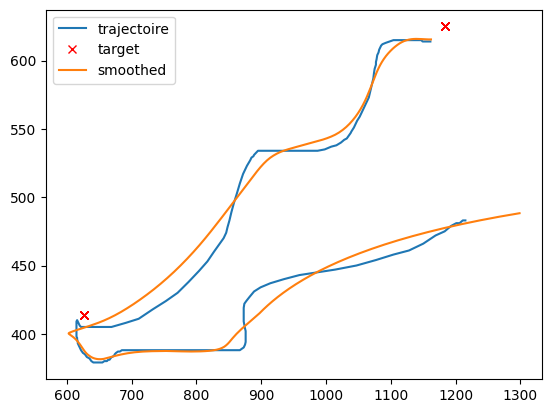

In [51]:
from dataset_handling import *
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

pd.options.mode.chained_assignment = None


(traj, y, targets) = read_dataset("/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C0.csv", "vec")

index = 200

xhat = savgol_filter(traj['x'].to_numpy(), 50, 3) 
yhat = savgol_filter(traj['y'].to_numpy(), 50, 3) 

plt.figure()
plt.plot(traj['x'][:index], traj['y'][:index], label="trajectoire")
plt.plot(targets['x_to'][:index], targets['y_to'][:index], 'rx', label="target")
plt.plot(xhat[:index], yhat[:index], label="smoothed")
plt.legend()

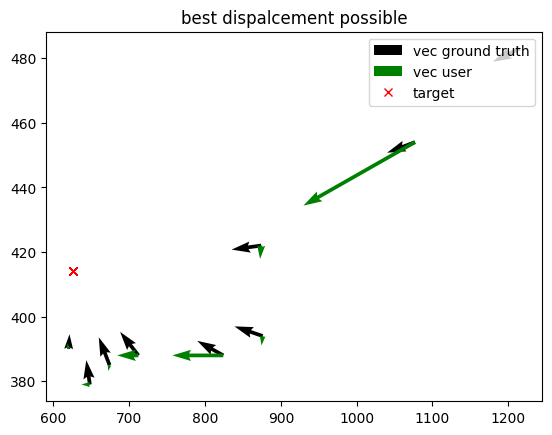

In [ ]:
from dataset_handling import *
traj, y, targets = read_dataset("/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C0.csv", "vec")

index = 100
e = 11
indexes = [i for i in range(index - e) if i % e == 0]
plt.quiver(traj['x'][indexes], traj['y'][indexes], y['dx'][indexes], y['dy'][indexes],  angles="xy", label="vec ground truth")
plt.quiver(traj['x'][indexes], traj['y'][indexes], traj['dx'][indexes], traj['dy'][indexes], angles="xy", color="green", label="vec user")

plt.plot(traj['x'][:index], traj['y'][:index], '.', label="trajectoire")
plt.plot(targets['x_to'][indexes], targets['y_to'][indexes], 'rx', label="target")
plt.title("best dispalcement possible")
plt.legend()

In [22]:
targets

,x_to,y_to
0,626.0,414.0
1,626.0,414.0
2,626.0,414.0
3,626.0,414.0
4,626.0,414.0
...,...,...
1699,1217.0,486.0
1700,1217.0,486.0
1701,1217.0,486.0
1702,1217.0,486.0
